In [2]:
import gplearn.extra_fitness as oldfitness
import pandas as pd
import numpy as np

In [3]:
df = pd.read_parquet('/home/pennymax/proj/MFM/CrossSection/v1_basic/basic_8h_2/fct_proc.parquet')
start_date = '2020-09-01 00:00:00+00:00'
end_date = '2024-01-01 00:00:00+00:00'
df = df.query('@start_date <= time < @end_date')
display(df)
display(df.index.get_level_values(0).unique())

Open      High       Low    Close  \
time                      symbol                                            
2020-09-01 00:00:00+00:00 ADAUSDT    0.12264   0.12590   0.11915   0.1255   
                          ALGOUSDT   0.50240   0.55440   0.49100   0.5345   
                          ATOMUSDT   7.20800   7.65700   6.98800   7.5770   
                          BANDUSDT  13.02300  14.57000  12.62930  14.5275   
                          BATUSDT    0.34860   0.35300   0.33950   0.3504   
...                                      ...       ...       ...      ...   
2023-12-31 16:00:00+00:00 YGGUSDT    0.42610   0.44570   0.40710   0.4261   
                          ZECUSDT   28.46000  28.57000  25.47000  26.9300   
                          ZENUSDT    9.47300   9.60900   8.63000   9.0610   
                          ZILUSDT    0.02533   0.02572   0.02400   0.0248   
                          ZRXUSDT    0.36810   0.38640   0.35870   0.3720   

                                          Volume        QuoVol   TrdCnt  \
time                      symbol                                          
2020-09-01 00:00:00+00:00 ADAUSDT   1.859759e+08  2.291442e+07  62712.0   
                          ALGOUSDT  3.380250e+07  1.795758e+07  55267.0   
                          ATOMUSDT  1.725656e+06  1.265856e+07  44745.0   
                          BANDUSDT  1.826682e+06  2.503081e+07  65798.0   
                          BATUSDT   1.470791e+07  5.097133e+06  28028.0   
...                                          ...           ...      ...   
2023-12-31 16:00:00+00:00 YGGUSDT   2.090920e+07  8.998258e+06  73970.0   
                          ZECUSDT   6.489027e+05  1.773391e+07  82423.0   
                          ZENUSDT   1.193518e+06  1.097834e+07  93218.0   
                          ZILUSDT   3.197006e+08  8.006506e+06  45641.0   
                          ZRXUSDT   2.997073e+07  1.121517e+07  72115.0   

                                     TakerBuyVol  TakerBuyQuoVol  \
time                      symbol                                   
2020-09-01 00:00:00+00:00 ADAUSDT   8.661606e+07    1.068731e+07   
                          ALGOUSDT  1.593180e+07    8.483083e+06   
                          ATOMUSDT  8.138771e+05    5.976147e+06   
                          BANDUSDT  9.456576e+05    1.296762e+07   
                          BATUSDT   7.174132e+06    2.488173e+06   
...                                          ...             ...   
2023-12-31 16:00:00+00:00 YGGUSDT   9.465695e+06    4.081564e+06   
                          ZECUSDT   2.529282e+05    6.929311e+06   
                          ZENUSDT   4.803335e+05    4.426438e+06   
                          ZILUSDT   1.390138e+08    3.484169e+06   
                          ZRXUSDT   1.442174e+07    5.393244e+06   

                                    funding_rate  ...  avgtrdquo5  vwap_bias1  \
time                      symbol                  ...                           
2020-09-01 00:00:00+00:00 ADAUSDT       0.000688  ...  363.500082    0.981767   
                          ALGOUSDT      0.000749  ...  277.246167    0.993920   
                          ATOMUSDT      0.001045  ...  254.119889    0.968128   
                          BANDUSDT     -0.000760  ...  362.446953    0.943237   
                          BATUSDT       0.000100  ...  189.741901    0.989034   
...                                          ...  ...         ...         ...   
2023-12-31 16:00:00+00:00 YGGUSDT       0.000630  ...  112.184503    1.009973   
                          ZECUSDT       0.000511  ...  183.972953    1.014819   
                          ZENUSDT       0.000394  ...  101.876953    1.015153   
                          ZILUSDT       0.000469  ...  157.213519    1.009829   
                          ZRXUSDT       0.000489  ...  139.593260    1.005925   

                                    vwap_bias3  vwap_bias5  trd_vwap_bias1  \
time                      symbol             

DatetimeIndex(['2020-09-01 00:00:00+00:00', '2020-09-01 08:00:00+00:00',
               '2020-09-01 16:00:00+00:00', '2020-09-02 00:00:00+00:00',
               '2020-09-02 08:00:00+00:00', '2020-09-02 16:00:00+00:00',
               '2020-09-03 00:00:00+00:00', '2020-09-03 08:00:00+00:00',
               '2020-09-03 16:00:00+00:00', '2020-09-04 00:00:00+00:00',
               ...
               '2023-12-28 16:00:00+00:00', '2023-12-29 00:00:00+00:00',
               '2023-12-29 08:00:00+00:00', '2023-12-29 16:00:00+00:00',
               '2023-12-30 00:00:00+00:00', '2023-12-30 08:00:00+00:00',
               '2023-12-30 16:00:00+00:00', '2023-12-31 00:00:00+00:00',
               '2023-12-31 08:00:00+00:00', '2023-12-31 16:00:00+00:00'],
              dtype='datetime64[us, UTC]', name='time', length=3651, freq=None)

In [5]:
from MFM.CrossSection.v1_basic.basic_8h_2.pipeline_steps import _get_X_y, _convert_expression_to_gp_program

X, y, feature_names = _get_X_y(df)
w = np.ones(X.shape[0])
print(X.shape, y.shape, w.shape, len(feature_names))

(3651, 52, 257) (3651, 257) (3651,) 52


In [18]:
from gplearn.genetic import _all_func_dictionary

exp = 'netbuyquo3'
# exp = 'ta_APO_12_26(ts_autocorr_60_1(signed_log(ts_autocorr_20_10(trd_vwap_bias5))))'
exp = 'tszs_120_add(ta_BBANDSl_5_2_2(spot_Open), ta_TEMA_5(netbuyquo3))'

print(f'ori expression: {exp}')
gp = _convert_expression_to_gp_program(exp, _all_func_dictionary, feature_names)
print(f'_Program print: {gp}')

y_pred = gp.execute_3D(X)
display(pd.DataFrame(y_pred))
display(pd.DataFrame(y_pred).describe())


ori expression: netbuyquo3
_Program print: netbuyquo3


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-1.001221e+06,-7.792510e+05,-5.291515e+05,-1.268128e+05,-321547.818887,-1.006551e+06,-1.156054e+06,-4.767086e+06,3.594826e+06,-124432.595150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.352915e+06,-1.051571e+06,-9.274898e+05,-5.884580e+05,-367449.383420,-1.368676e+06,-1.683073e+06,-6.249875e+06,2.708790e+06,-112197.296097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.953325e+06,-9.741847e+05,-8.546906e+05,-8.736700e+04,-310431.108287,-9.950249e+05,-1.960542e+06,-1.091626e+07,1.743026e+06,-94955.786430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2.225504e+06,-1.017452e+06,-7.578537e+05,-7.222793e+05,-409193.839373,-2.300360e+06,-2.018151e+06,-4.986761e+07,1.048492e+06,-203735.168107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-2.853376e+06,-2.104211e+06,-9.739278e+05,-9.180268e+05,-758975.549787,-6.347532e+06,-3.525921e+06,-1.034112e+08,4.140703e+05,-557798.894270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,-1.982985e+06,-7.640487e+05,-2.235669e+06,-2.507635e+05,-5557.231743,-1.868809e+06,-3.228772e+06,-7.883888e+07,-8.251665e+05,-398299.809420,...,-301566.263267,-1.047266e+06,-291954.758663,-1.338231e+06,-1.406529e+06,-264904.582200,17481.162333,-4.089148e+05,-649656.857667,-2.044593e+06
3647,-1.542573e+06,-9.059596e+05,-2.049463e+06,-1.137966e+05,-47900.055733,-1.732456e+06,-3.167868e+06,-1.713702e+07,-4.640036e+05,-343764.695863,...,-381404.578367,-1.080565e+06,-374778.316094,-6.140428e+05,-9.358740e+05,-307792.851867,6430.489000,-2.181016e+05,-725889.494000,-1.916870e+06
3648,-1.312536e+06,-7.951913e+05,-1.264393e+06,-2.204707e+05,-27617.214840,-2.700643e+06,-2.993952e+06,3.224689e+07,-3.760204e+05,-398663.348477,...,-397037.484967,-5.440680e+05,-339018.380431,-8.042401e+05,-8.133522e+05,-290560.567100,59669.498367,-7.282918e+05,-324639.099667,-1.556249e+06
3649,-2.605690e+06,-4.378115e+05,-1.227809e+06,-9.083490e+05,-54794.029883,-2.821919e+06,-2.379402e+06,-4.034102e+07,-3.337650e+05,-328504.860507,...,-556812.402833,-4.511814e+05,-258231.709209,-2.046098e+06,-6.923955e+05,-195333.081900,64041.651000,-1.807897e+06,-341831.376333,-1.800356e+06


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
count,3.651000e+03,3.651000e+03,3.651000e+03,3.651000e+03,3.651000e+03,3.651000e+03,3.651000e+03,3.651000e+03,3.651000e+03,3.651000e+03,...,8.300000e+01,7.500000e+01,7.400000e+01,5.900000e+01,5.900000e+01,4.700000e+01,44.000000,4.400000e+01,4.100000e+01,1.100000e+01
mean,-5.748228e+06,-1.121143e+06,-1.537143e+06,-4.252197e+05,-3.421376e+05,-1.892489e+06,-6.943701e+06,-1.768869e+07,-5.172452e+05,-4.708756e+05,...,-7.635709e+05,-8.399841e+05,-4.370808e+05,-4.028675e+06,-2.336138e+06,-6.885655e+05,-88218.672431,-1.014478e+06,-5.786525e+05,-3.820956e+06
std,1.038038e+07,2.131030e+06,2.776497e+06,1.133433e+06,6.180001e+05,1.042696e+07,1.490931e+07,1.205247e+08,1.326803e+06,7.979844e+05,...,5.310770e+05,4.282760e+05,8.061551e+05,4.930611e+06,9.802820e+05,5.762899e+05,67511.515763,4.645352e+05,6.281862e+05,1.766613e+06
min,-1.329274e+08,-2.379179e+07,-2.174933e+07,-6.817254e+06,-6.565964e+06,-5.464532e+07,-1.962526e+08,-8.813606e+08,-1.097632e+07,-6.390392e+06,...,-2.142810e+06,-1.801452e+06,-1.760675e+06,-1.008047e+07,-4.549377e+06,-2.676655e+06,-243326.923567,-2.270648e+06,-2.590021e+06,-5.915978e+06
25%,-6.960230e+06,-1.363358e+06,-2.336971e+06,-6.453066e+05,-4.075137e+05,-2.584870e+06,-7.624346e+06,-7.819527e+07,-8.224812e+05,-6.639884e+05,...,-1.114009e+06,-1.075805e+06,-8.310547e+05,-6.301462e+06,-3.159936e+06,-9.610685e+05,-121365.072150,-1.228800e+06,-6.567139e+05,-5.316078e+06
50%,-2.307337e+06,-4.477216e+05,-8.263625e+05,-2.576244e+05,-1.433363e+05,-9.762210e+05,-2.653840e+06,-1.496313e+07,-3.178953e+05,-2.538613e+05,...,-7.010853e+05,-7.424410e+05,-6.076913e+05,-5.462548e+06,-2.063180e+06,-4.884808e+05,-84574.642100,-8.892666e+05,-4.014161e+05,-4.807505e+06
75%,-4.021432e+05,-1.408994e+05,-1.972758e+05,-8.671575e+04,-3.403695e+04,-1.406268e+05,-3.075157e+05,3.838205e+07,-6.878093e+04,-6.257063e+04,...,-4.348435e+05,-5.389073e+05,-2.317117e+05,-3.521392e+06,-1.492590e+06,-2.726666e+05,-47267.114817,-7.298177e+05,-1.535643e+05,-1.980732e+06
max,1.310947e+07,1.030176e+07,1.691004e+07,2.754059e+07,2.614355e+06,3.496350e+08,1.776851e+07,6.761255e+08,1.433334e+07,6.186320e+06,...,1.113785e+06,-8.916572e+04,3.525506e+06,1.694435e+07,-6.923955e+05,1.943547e+05,64041.651000,-2.181016e+05,2.798896e+05,-1.556249e+06


In [24]:
oldfitness.fitness_quantile35_longshort_sharpe_fine_cumprod_with_fee(y, y_pred, w)

/home/pennymax/proj/gplearn/gplearn/extra_fitness.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rates = rates.replace([np.inf, -np.inf], 0)
/home/pennymax/proj/gplearn/gplearn/extra_fitness.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rates = rates.replace([np.inf, -np.inf], 0)


3.055904162170614

/home/pennymax/proj/gplearn/gplearn/extra_fitness.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rates = rates.replace([np.inf, -np.inf], 0)
/home/pennymax/proj/gplearn/gplearn/extra_fitness.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rates = rates.replace([np.inf, -np.inf], 0)


0            NaN
1       0.035937
2      -0.018771
3      -0.019324
4       0.013508
          ...   
3646    0.010213
3647   -0.000896
3648    0.022070
3649   -0.028144
3650    0.000876
Length: 3651, dtype: float64

<Axes: >

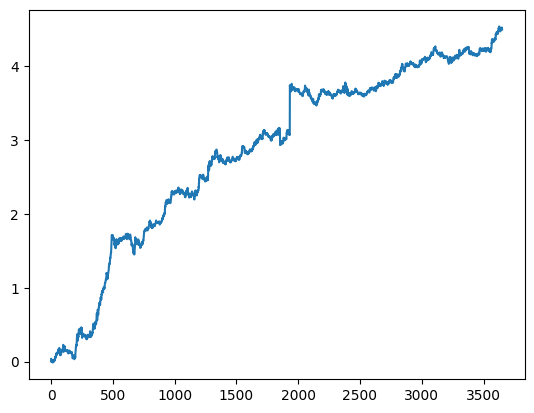

In [30]:
longshort_rets = oldfitness.quantile_longshort_returns(y, y_pred, w, quantile=35, fee_rate=oldfitness._fee_rate)
# longshort_rets = oldfitness.quantile_longshort_returns(y, y_pred, w, quantile=35, fee_rate=0)
display(longshort_rets)
longshort_rets.cumsum().plot()

In [32]:
oldfitness.sharpe_fine(longshort_rets.dropna(), comp=True, annual_bars=oldfitness._annual_bar_8h)

3.0573398894616743